# ANN

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import time

In [66]:
###### Get the directory path of the file
#parent_dir = os.getcwd()
#
#
##chemin vers les données
#data_dir = parent_dir + "\Raw_data\data"
#
## Print the directory path
#print(data_dir)

C:\Users\Maxime.ALTER\Raw_data\data


In [67]:
#filename_test = "sign_mnist_test.csv"
#filename_train = "sign_mnist_train.csv"
#
## File path
#file_path_test = data_dir + "\\" +filename_test
#file_path_train = data_dir + "\\" +  filename_train
#
#print(file_path_test)

C:\Users\Maxime.ALTER\Raw_data\data\sign_mnist_test.csv


In [74]:
#test = pd.read_csv(file_path_test)
#train = pd.read_csv(file_path_train)
#
#df = pd.concat([train, test])

In [4]:
test = pd.read_csv(r"C:\Users\Maxime.ALTER\ProjetIA\ProjetIA\Raw_data\data\sign_mnist_test.csv")
train = pd.read_csv(r"C:\Users\Maxime.ALTER\ProjetIA\ProjetIA\Raw_data\data\sign_mnist_train.csv")

df = pd.concat([train, test])

In [117]:
#class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 
#               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
#class_names = pd.DataFrame(class_names)
#class_names.columns = ["newLabel"]
#                                     
#class_number = list(range(1,25))
#class_names.index = class_number
#class_names["nb"] = class_number
#
#print(class_names)

In [5]:
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train=keras.utils.to_categorical(y_train,25)
y_test=keras.utils.to_categorical(y_test)

In [7]:
##X_train=train.drop(columns=["label"])
##y_train=train["label"]
##y_train=keras.utils.to_categorical(y_train,25)
##X_test=test.drop(columns=["label"])
##y_test=test["label"]
##y_test=keras.utils.to_categorical(y_test)

In [127]:
X_train=np.array(X_train,dtype="float32")
X_test=np.array(X_test,dtype="float32")
X_test

array([[204., 206., 206., ..., 221., 220., 217.],
       [158., 161., 163., ..., 231., 229., 229.],
       [118., 124., 137., ...,  89., 101.,  92.],
       ...,
       [127., 130., 134., ..., 139., 159., 189.],
       [106., 108., 110., ..., 144., 145., 146.],
       [218., 218., 219., ..., 240., 186., 111.]], dtype=float32)

In [95]:
X_train/=255
X_test/=255
X_test

#sc = StandardScaler()
#
#Xtrain = sc.fit_transform(X_train)
#Xtest = sc.fit_transform(X_test)

array([[0.8       , 0.80784315, 0.80784315, ..., 0.8666667 , 0.8627451 ,
        0.8509804 ],
       [0.61960787, 0.6313726 , 0.6392157 , ..., 0.90588236, 0.8980392 ,
        0.8980392 ],
       [0.4627451 , 0.4862745 , 0.5372549 , ..., 0.34901962, 0.39607844,
        0.36078432],
       ...,
       [0.49803922, 0.50980395, 0.5254902 , ..., 0.54509807, 0.62352943,
        0.7411765 ],
       [0.41568628, 0.42352942, 0.43137255, ..., 0.5647059 , 0.5686275 ,
        0.57254905],
       [0.85490197, 0.85490197, 0.85882354, ..., 0.9411765 , 0.7294118 ,
        0.43529412]], dtype=float32)

In [96]:
print("X_train shape" +  str(X_train.shape))
print("X_test shape" +  str(X_test.shape))

X_train shape(25970, 784)
X_test shape(8657, 784)


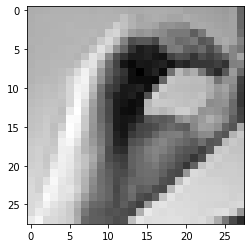

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[6].reshape(28,28) ,cmap="gray")
#print(y_train[1])

In [101]:
start = time.time()

model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,),name="first_layer"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu",name="second_layer"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu",name="third_layer"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu",name="fourth_layer"))
model.add(Dropout(0.2))
model.add(Dense(25,activation="softmax",name="output_layer"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


training=model.fit(X_train,y_train,epochs=50,batch_size=100,validation_split=0.2)

stop1 = time.time()

y_pred_1 = model.predict(X_test)

stop2 = time.time()

apprentissage_DTC = round(stop1-start,3)
prediction_DTC = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_DTC} s")
print(f"Temps d'apprentissage+prediction : {prediction_DTC} s")

Epoch 1/50
208/208 [==============================] - 3s 9ms/step - loss: 2.9399 - accuracy: 0.1089 - val_loss: 2.2283 - val_accuracy: 0.2613
Epoch 2/50
208/208 [==============================] - 2s 8ms/step - loss: 2.1212 - accuracy: 0.2905 - val_loss: 1.6648 - val_accuracy: 0.4430
Epoch 3/50
208/208 [==============================] - 2s 8ms/step - loss: 1.7396 - accuracy: 0.3996 - val_loss: 1.4081 - val_accuracy: 0.5150
Epoch 4/50
208/208 [==============================] - 2s 8ms/step - loss: 1.5485 - accuracy: 0.4633 - val_loss: 1.1343 - val_accuracy: 0.6169
Epoch 5/50
208/208 [==============================] - 2s 8ms/step - loss: 1.3781 - accuracy: 0.5168 - val_loss: 1.0172 - val_accuracy: 0.6456
Epoch 6/50
208/208 [==============================] - 2s 8ms/step - loss: 1.2462 - accuracy: 0.5615 - val_loss: 1.0185 - val_accuracy: 0.6380
Epoch 7/50
208/208 [==============================] - 2s 7ms/step - loss: 1.1235 - accuracy: 0.6072 - val_loss: 0.8584 - val_accuracy: 0.7137
Epoch 

In [85]:
##model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [173]:
##training=model.fit(X_train,y_train,epochs=10,batch_size=100,validation_split=0.2)

Epoch 1/50
208/208 [==============================] - 2s 7ms/step - loss: 2.9803 - accuracy: 0.1007 - val_loss: 2.3353 - val_accuracy: 0.2199
Epoch 2/50
208/208 [==============================] - 1s 7ms/step - loss: 2.1421 - accuracy: 0.2875 - val_loss: 1.6446 - val_accuracy: 0.4436
Epoch 3/50
208/208 [==============================] - 1s 7ms/step - loss: 1.7376 - accuracy: 0.4053 - val_loss: 1.4193 - val_accuracy: 0.5127
Epoch 4/50
208/208 [==============================] - 1s 7ms/step - loss: 1.4598 - accuracy: 0.4940 - val_loss: 1.0840 - val_accuracy: 0.6203
Epoch 5/50
208/208 [==============================] - 1s 7ms/step - loss: 1.3160 - accuracy: 0.5427 - val_loss: 1.0268 - val_accuracy: 0.6236
Epoch 6/50
208/208 [==============================] - 1s 7ms/step - loss: 1.1933 - accuracy: 0.5838 - val_loss: 0.8634 - val_accuracy: 0.7056
Epoch 7/50
208/208 [==============================] - 1s 7ms/step - loss: 1.0841 - accuracy: 0.6189 - val_loss: 0.8012 - val_accuracy: 0.7349
Epoch 

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 second_layer (Dense)        (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 third_layer (Dense)         (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 fourth_layer (Dense)        (None, 64)               

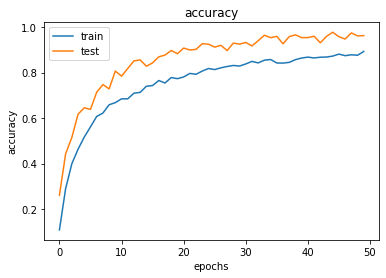

In [102]:
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","test"])

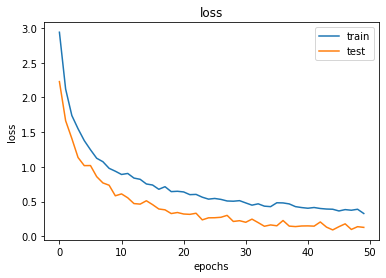

In [103]:
plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","test"])

In [108]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("test_loss",test_loss,"\n","test_accuracy",test_accuracy)

271/271 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9638
test_loss 0.12402533739805222 
 test_accuracy 0.9638442993164062


In [206]:
#y_pred_1 = model.predict(X_test)

271/271 [==============================] - 0s 1ms/step


In [135]:
y_pred_1 = np.argmax(y_pred_1, axis=1)
y_pred_1.shape

AxisError: axis 1 is out of bounds for array of dimension 1

In [110]:
y_test_1 = y_test
print(y_test_1.shape, y_test_1)

(8657, 25) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_1,y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

from sklearn.metrics import classification_report
print(classification_report(y_test_1, y_pred_1))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

# CNN

In [134]:
from keras.layers import Conv2D,Flatten,MaxPool2D,BatchNormalization,Activation,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [6]:
print("X_train shape" +  str(X_train.shape))
print("y_train shape" +  str(y_train.shape))
print("X_test shape" +  str(X_test.shape))
print("y_test shape" +  str(y_test.shape))

X_train shape(25970, 784)
y_train shape(25970, 25)
X_test shape(8657, 784)
y_test shape(8657, 25)


In [7]:
X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)

In [8]:
print("X_train shape" +  str(X_train.shape))

print("X_test shape" +  str(X_test.shape))

X_train shape(25970, 28, 28, 1)
X_test shape(8657, 28, 28, 1)


In [142]:
data_gen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
data_gen.fit(X_train)

In [147]:
model1=Sequential()
model1.add(Conv2D(64,(3,3),input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

model1.add(Conv2D(128,(3,3),input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

model1.add(Conv2D(256,(3,3),input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Activation("relu"))
model1.add(MaxPool2D(2,2))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(128,activation="relu"))
model1.add(Dense(25,activation="softmax"))

In [148]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)      

In [149]:
model1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [150]:
training1=model1.fit(data_gen.flow(X_train,y_train,batch_size=100),epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
260/260 [==============================] - 23s 84ms/step - loss: 1.1330 - accuracy: 0.6400 - val_loss: 0.3146 - val_accuracy: 0.9004
Epoch 2/50
260/260 [==============================] - 22s 84ms/step - loss: 0.2989 - accuracy: 0.9035 - val_loss: 0.0995 - val_accuracy: 0.9794
Epoch 3/50
260/260 [==============================] - 20s 79ms/step - loss: 0.1579 - accuracy: 0.9506 - val_loss: 0.1873 - val_accuracy: 0.9347
Epoch 4/50
260/260 [==============================] - 20s 78ms/step - loss: 0.1109 - accuracy: 0.9648 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 5/50
260/260 [==============================] - 21s 79ms/step - loss: 0.0807 - accuracy: 0.9751 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 6/50
260/260 [==============================] - 23s 87ms/step - loss: 0.0686 - accuracy: 0.9778 - val_loss: 0.0100 - val_accuracy: 0.9987
Epoch 7/50
260/260 [==============================] - 21s 81ms/step - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.0727 - val_accuracy:

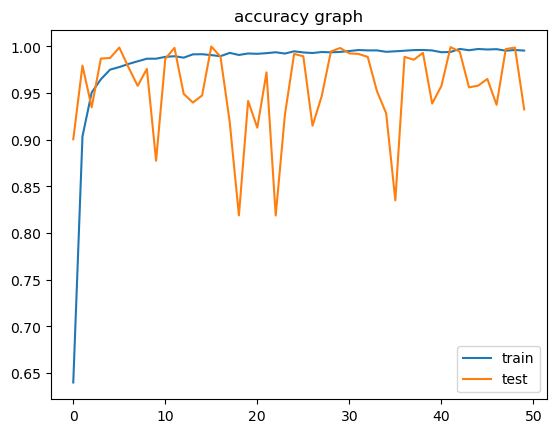

In [152]:
plt.plot(training1.history["accuracy"])
plt.plot(training1.history["val_accuracy"])
plt.title("accuracy graph")
plt.legend(["train","test"])

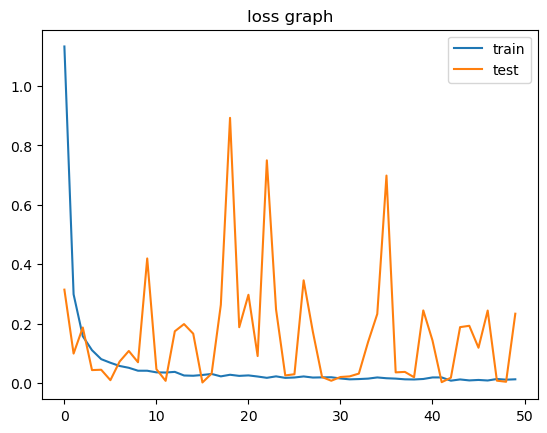

In [153]:
plt.plot(training1.history["loss"])
plt.plot(training1.history["val_loss"])
plt.title("loss graph")
plt.legend(["train","test"])

In [154]:
y_pred = model1.predict(X_test)

271/271 [==============================] - 2s 6ms/step


In [155]:
y_predic = np.argmax(y_pred, axis=1)
y_predic

array([ 8,  2, 17, ...,  3,  0, 14], dtype=int64)

In [156]:
y_predic.shape

(8657,)

In [157]:
y_test.shape

(8657, 25)

In [3]:
y_test2= np.argmax(y_test, axis=1)
y_test2.shape

NameError: name 'y_test' is not defined

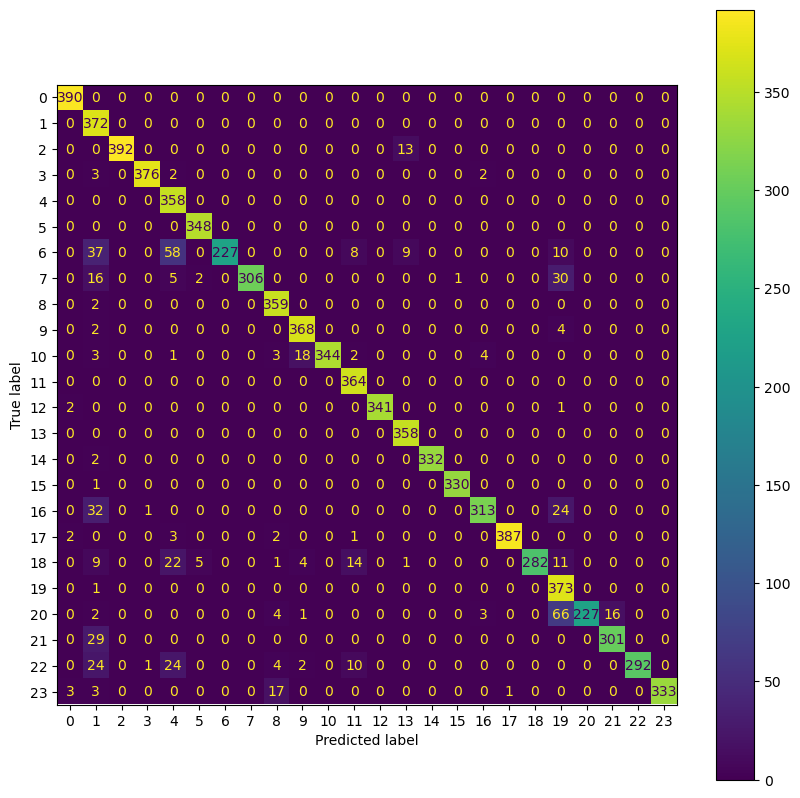

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test2,y_predic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predic))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       390
           1       0.69      1.00      0.82       372
           2       1.00      0.97      0.98       405
           3       0.99      0.98      0.99       383
           4       0.76      1.00      0.86       358
           5       0.98      1.00      0.99       348
           6       1.00      0.65      0.79       349
           7       1.00      0.85      0.92       360
           8       0.92      0.99      0.96       361
          10       0.94      0.98      0.96       374
          11       1.00      0.92      0.96       375
          12       0.91      1.00      0.95       364
          13       1.00      0.99      1.00       344
          14       0.94      1.00      0.97       358
          15       1.00      0.99      1.00       334
          16       1.00      1.00      1.00       331
          17       0.97      0.85      0.90       370
          18       1.00    